In [1]:
import pandas as pd


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [75]:
df = pd.DataFrame(iris.data, columns=(iris.feature_names))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [22]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Exploring the data

In [18]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
#for setosa flower
df0 = df[df.flower_name == 'setosa']
#for versicolor flower
df1 = df[df.flower_name == 'versicolor']
#for virginica flower
df2 = df[df.flower_name == 'virginica']

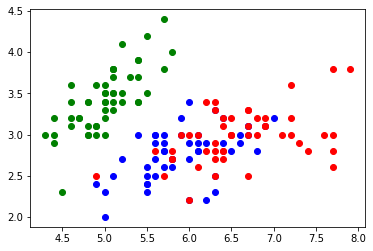

In [51]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='o')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='o')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', marker='o')

###  Preparing the model

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [70]:
x = df.drop(df[['target','flower_name']], axis='columns')
y = df['target']

In [71]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [72]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [73]:
model.score(x_test, y_test)

0.9

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree

In [76]:
from sklearn.model_selection import cross_val_score

In [83]:
cross_val_score(LogisticRegression(), x, y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [82]:
cross_val_score(SVC(), x, y)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [88]:
cross_val_score(tree.DecisionTreeClassifier(), x,y)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [87]:
RandomForestClassifier
cross_val_score(RandomForestClassifier(), x,y)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])